In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv('./Datasets/weather_classification_data.csv')
columns_to_drop = ['Cloud Cover', 'Season', 'Weather Type']
data = data.drop(columns_to_drop, axis=1)
X = data.drop('Location', axis=1)
y = data['Location']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Decision Tree ID3
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_pred)
nb_acc = accuracy_score(y_test, nb_pred)

print("Decision Tree ID3:")
print("Confusion Matrix:\n", dt_cm)
print("Accuracy:", dt_acc)

print("\nNaïve Bayes:")
print("Confusion Matrix:\n", nb_cm)
print("Accuracy:", nb_acc)

Decision Tree ID3:
Confusion Matrix:
 [[512 432 468]
 [454 733 730]
 [461 783 707]]
Accuracy: 0.3696969696969697

Naïve Bayes:
Confusion Matrix:
 [[ 676  680   56]
 [ 601 1191  125]
 [ 629 1179  143]]
Accuracy: 0.3806818181818182


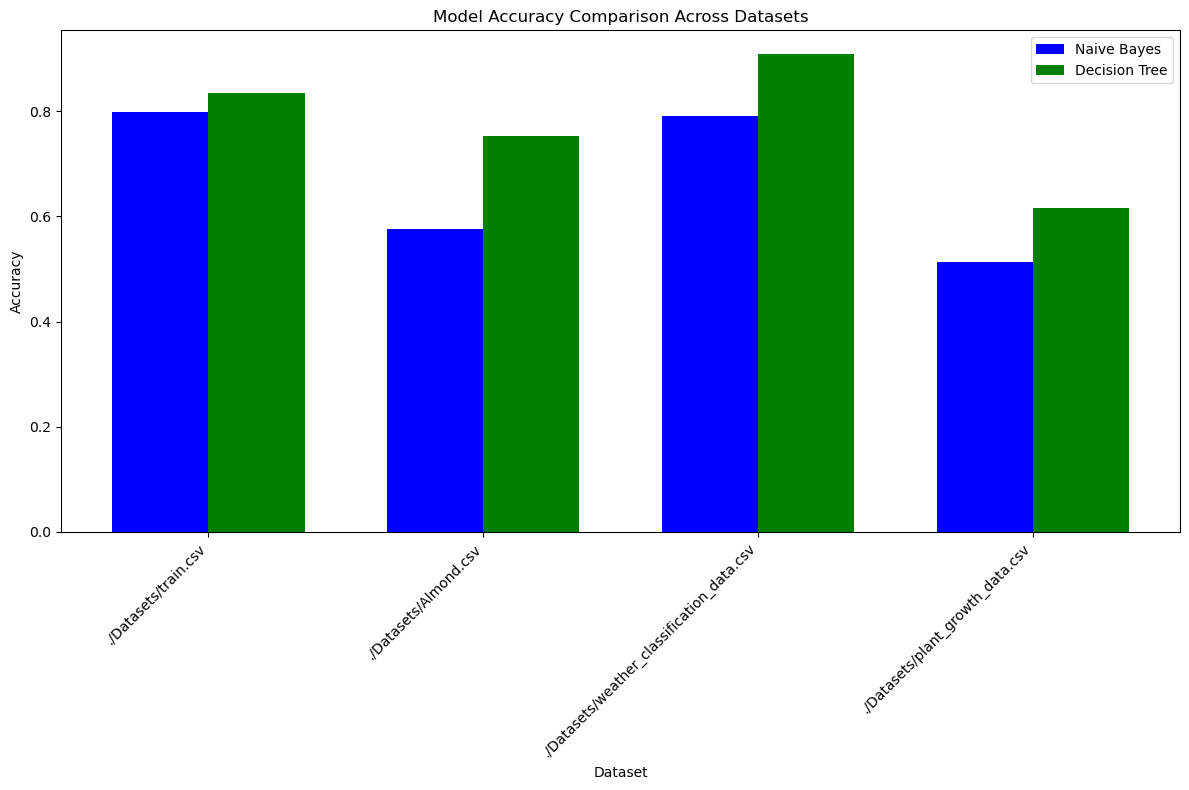

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

def prepare_data(dataset_path, target_column):
    df = pd.read_csv(dataset_path)

    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    if target_column not in df.columns:
        raise KeyError(f"'{target_column}' column not found in the dataset.")

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    return X, y

def train_and_evaluate(X, y):
    X = pd.get_dummies(X)

    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_val_scaled = scaler.transform(X_val_split)

    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train_split)

    y_val_pred_nb = nb_model.predict(X_val_scaled)
    val_accuracy_nb = accuracy_score(y_val_split, y_val_pred_nb)

    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_scaled, y_train_split)

    y_val_pred_dt = dt_model.predict(X_val_scaled)
    val_accuracy_dt = accuracy_score(y_val_split, y_val_pred_dt)

    return val_accuracy_nb, val_accuracy_dt

datasets = [
    {'path': './Datasets/train.csv', 'target_column': 'price_range'},
    {'path': './Datasets/Almond.csv', 'target_column': 'Type'},  # Target column for Almond dataset
    {'path': './Datasets/weather_classification_data.csv', 'target_column': 'Weather Type'},  # Target column for weather dataset
    {'path': './Datasets/plant_growth_data.csv', 'target_column': 'Growth_Milestone'}  # Target column for plant growth dataset
]

# Store results
results = {'Dataset': [], 'Naive Bayes Accuracy': [], 'Decision Tree Accuracy': []}

for dataset in datasets:
    try:
        X, y = prepare_data(dataset['path'], dataset['target_column'])
        val_accuracy_nb, val_accuracy_dt = train_and_evaluate(X, y)

        results['Dataset'].append(dataset['path'])
        results['Naive Bayes Accuracy'].append(val_accuracy_nb)
        results['Decision Tree Accuracy'].append(val_accuracy_dt)

    except KeyError as e:
        print(f"Error processing dataset {dataset['path']}: {e}")

# Create DataFrame for plotting
results_df = pd.DataFrame(results)

# Plotting the accuracies
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Naive Bayes accuracies
bar_width = 0.35
index = range(len(results_df['Dataset']))
bar1 = ax.bar(index, results_df['Naive Bayes Accuracy'], bar_width, label='Naive Bayes', color='blue')

# Plot Decision Tree accuracies
bar2 = ax.bar([i + bar_width for i in index], results_df['Decision Tree Accuracy'], bar_width, label='Decision Tree', color='green')

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison Across Datasets')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Dataset'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('./Datasets/weather_classification_data.csv')
columns_to_drop = ['Cloud Cover', 'Location', 'Weather Type']
data = data.drop(columns_to_drop, axis=1)
X = data.drop('Season', axis=1)
y = data['Season']

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Decision Tree with cross-validation
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=kf)

# Naïve Bayes with cross-validation
nb_cv_scores = cross_val_score(GaussianNB(), X, y, cv=kf)

# Ensemble models (Random Forest and AdaBoost)
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=kf)
ada_cv_scores = cross_val_score(AdaBoostClassifier(algorithm='SAMME', random_state=42), X, y, cv=kf)

print("Decision Tree:", dt_cv_scores.mean())
print("Naïve Bayes:", nb_cv_scores.mean())
print("Random Forest:", rf_cv_scores.mean())
print("AdaBoost:", ada_cv_scores.mean())

Decision Tree: 0.4146969696969697
Naïve Bayes: 0.4250757575757575
Random Forest: 0.41484848484848486
AdaBoost: 0.4263636363636364
